In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# Cargar el dataset
data = pd.read_csv('/content/dataset.txt',index_col=0)


In [ ]:
# Ver estructura
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 150150 entries, 1 to 212644
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store ID     150150 non-null  int64  
 1   Total Price  150149 non-null  float64
 2   Base Price   150150 non-null  float64
 3   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 5.7 MB
None


In [ ]:
print(data.head())

    Store ID  Total Price  Base Price  Units Sold
ID                                               
1       8091      99.0375    111.8625          20
2       8091      99.0375     99.0375          28
3       8091     133.9500    133.9500          19
4       8091     133.9500    133.9500          44
5       8091     141.0750    141.0750          52


In [ ]:
print(data.tail())

        Store ID  Total Price  Base Price  Units Sold
ID                                                   
212638      9984     235.8375    235.8375          38
212639      9984     235.8375    235.8375          30
212642      9984     357.6750    483.7875          31
212643      9984     141.7875    191.6625          12
212644      9984     234.4125    234.4125          15


In [ ]:
# Verificar los tipos de datos
print(data.dtypes)

Store ID         int64
Total Price    float64
Base Price     float64
Units Sold       int64
dtype: object


In [ ]:
# Descripción estadística básica
print(data.describe())

            Store ID    Total Price     Base Price     Units Sold
count  150150.000000  150149.000000  150150.000000  150150.000000
mean     9199.422511     206.626751     219.425927      51.674206
std       615.591445     103.308516     110.961712      60.207904
min      8023.000000      41.325000      61.275000       1.000000
25%      8562.000000     130.387500     133.237500      20.000000
50%      9371.000000     198.075000     205.912500      35.000000
75%      9731.000000     233.700000     234.412500      62.000000
max      9984.000000     562.162500     562.162500    2876.000000


In [ ]:
# Comprobar si hay datos nulos
print(data.isnull().sum())

Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64


In [ ]:
# Limpiar los datos, eliminando valores nulos o erróneos
data = data.dropna()

In [ ]:
# Comprobar si hay datos nulos
print(data.isnull().sum())

Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64


In [ ]:
data.duplicated().sum()

np.int64(34680)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
print(data.columns)
print(data.index)

Index(['Store ID', 'Total Price', 'Base Price', 'Units Sold'], dtype='object')
Index([     1,      2,      3,      4,      5,      9,     10,     13,     14,
           17,
       ...
       212614, 212616, 212617, 212619, 212626, 212628, 212632, 212634, 212642,
       212643],
      dtype='int64', name='ID', length=115469)


In [ ]:
data['Descuento']=((data['Base Price']-data['Total Price'])/data['Base Price'])*100

In [ ]:
dataT= data.loc[:,['Store ID','Total Price', 'Base Price',
       'Units Sold','Descuento']]

In [ ]:
dataT.describe()

,Store ID,Total Price,Base Price,Units Sold,Descuento
count,115469.000000,115469.000000,115469.00000,115469.000000,115469.000000
mean,9204.898726,192.452723,208.58147,59.145788,6.207894
std,614.894781,94.491969,106.39660,65.867896,11.276724
min,8023.000000,41.325000,61.27500,1.000000,-51.515152
25%,8869.000000,118.987500,130.38750,23.000000,0.000000
50%,9425.000000,178.125000,205.20000,41.000000,0.000000
75%,9731.000000,227.287500,232.98750,72.000000,12.025316
max,9984.000000,562.162500,562.16250,2876.000000,82.370821


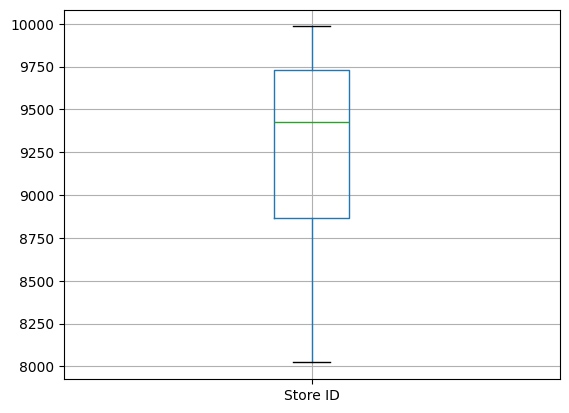

In [ ]:
data.boxplot(column="Store ID")
plt.show()

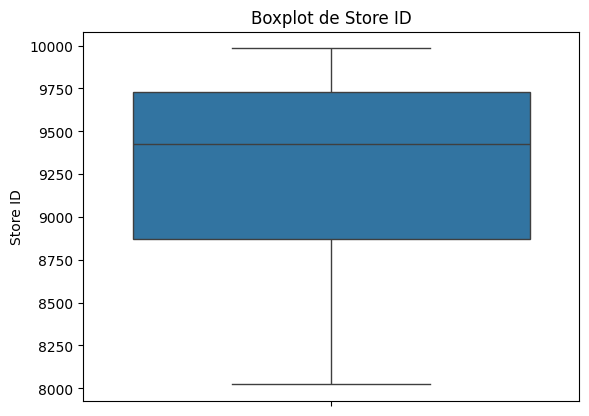

In [ ]:

sns.boxplot(y=dataT['Store ID'])
plt.title("Boxplot de Store ID")
plt.show()

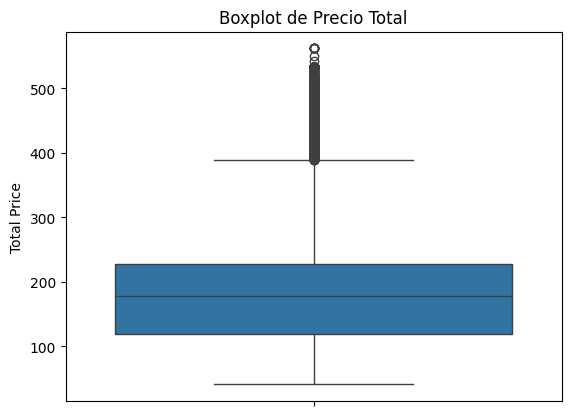

In [ ]:
sns.boxplot(y=dataT['Total Price'])
plt.title("Boxplot de Precio Total")
plt.show()

In [ ]:
Q1=dataT['Total Price'].quantile(0.25)
Q3=dataT['Total Price'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
up=Q3+1.5*IQR

# outliers=dataT[(dataT['Total Price']<low)|(dataT['Total Price']>up)]
# print(f"Número de outliers encontrados:{len(outliers)}")

dataclean=dataT[(dataT['Total Price']>=low)&(dataT['Total Price']<=up)]
print(dataclean)
# outliers=dataclean[(dataclean['Total Price']<low)|(dataclean['Total Price']>up)]
# print(f"Número de outliers encontrados:{len(outliers)}")

Número de outliers encontrados:6271
        Store ID  Total Price  Base Price  Units Sold  Descuento
ID                                                              
1           8091      99.0375    111.8625          20  11.464968
2           8091      99.0375     99.0375          28   0.000000
3           8091     133.9500    133.9500          19   0.000000
4           8091     133.9500    133.9500          44   0.000000
5           8091     141.0750    141.0750          52   0.000000
...          ...          ...         ...         ...        ...
212628      9984     170.2875    170.2875          30   0.000000
212632      9984     194.5125    194.5125          85   0.000000
212634      9984     163.8750    210.9000         204  22.297297
212642      9984     357.6750    483.7875          31  26.067747
212643      9984     141.7875    191.6625          12  26.022305

[109198 rows x 5 columns]
Número de outliers encontrados:0


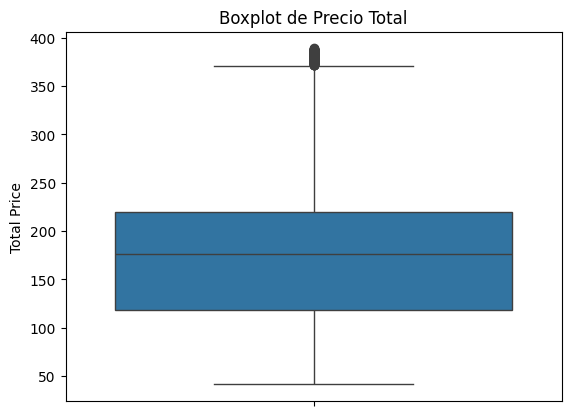

In [ ]:
sns.boxplot(y=dataclean['Total Price'])
plt.title("Boxplot de Precio Total")
plt.show()

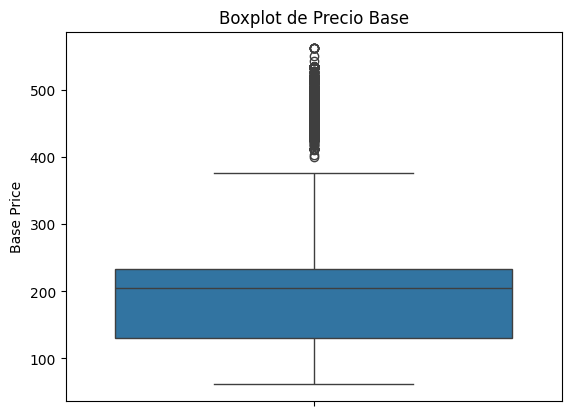

In [ ]:
sns.boxplot(y=dataT['Base Price'])
plt.title("Boxplot de Precio Base")
plt.show()

In [ ]:
Q1=dataclean['Base Price'].quantile(0.25)
Q3=dataclean['Base Price'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
up=Q3+1.5*IQR

outliers=dataclean[(dataclean['Base Price']<low)|(dataclean['Base Price']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

dataclean=dataclean[(dataclean['Base Price']>=low)&(dataclean['Base Price']<=up)]
print(dataclean)
outliers=dataclean[(dataclean['Base Price']<low)|(dataclean['Base Price']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

Número de outliers encontrados:0
        Store ID  Total Price  Base Price  Units Sold  Descuento
ID                                                              
1           8091      99.0375    111.8625          20  11.464968
2           8091      99.0375     99.0375          28   0.000000
3           8091     133.9500    133.9500          19   0.000000
4           8091     133.9500    133.9500          44   0.000000
5           8091     141.0750    141.0750          52   0.000000
...          ...          ...         ...         ...        ...
212619      9961     141.7875    177.4125          13  20.080321
212626      9984     131.1000    131.1000          32   0.000000
212628      9984     170.2875    170.2875          30   0.000000
212632      9984     194.5125    194.5125          85   0.000000
212643      9984     141.7875    191.6625          12  26.022305

[97365 rows x 5 columns]
Número de outliers encontrados:0


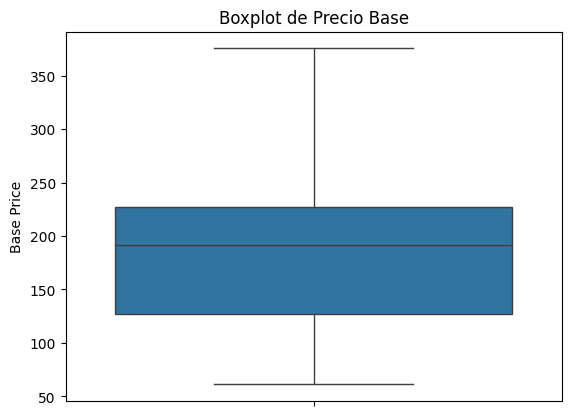

In [ ]:
sns.boxplot(y=dataclean['Base Price'])
plt.title("Boxplot de Precio Base")
plt.show()

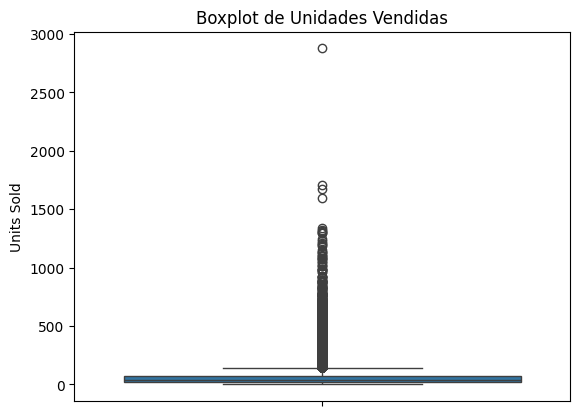

In [ ]:
sns.boxplot(y=dataT['Units Sold'])
plt.title("Boxplot de Unidades Vendidas")
plt.show()

In [ ]:
Q1=dataclean['Units Sold'].quantile(0.25)
Q3=dataclean['Units Sold'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
up=Q3+1.5*IQR

outliers=dataclean[(dataclean['Units Sold']<low)|(dataclean['Units Sold']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

dataclean=dataclean[(dataclean['Units Sold']>=low)&(dataclean['Units Sold']<=up)]
print(dataclean)
outliers=dataclean[(dataclean['Units Sold']<low)|(dataclean['Units Sold']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

Número de outliers encontrados:7005
        Store ID  Total Price  Base Price  Units Sold  Descuento
ID                                                              
1           8091      99.0375    111.8625          20  11.464968
2           8091      99.0375     99.0375          28   0.000000
3           8091     133.9500    133.9500          19   0.000000
4           8091     133.9500    133.9500          44   0.000000
5           8091     141.0750    141.0750          52   0.000000
...          ...          ...         ...         ...        ...
212619      9961     141.7875    177.4125          13  20.080321
212626      9984     131.1000    131.1000          32   0.000000
212628      9984     170.2875    170.2875          30   0.000000
212632      9984     194.5125    194.5125          85   0.000000
212643      9984     141.7875    191.6625          12  26.022305

[97365 rows x 5 columns]
Número de outliers encontrados:0


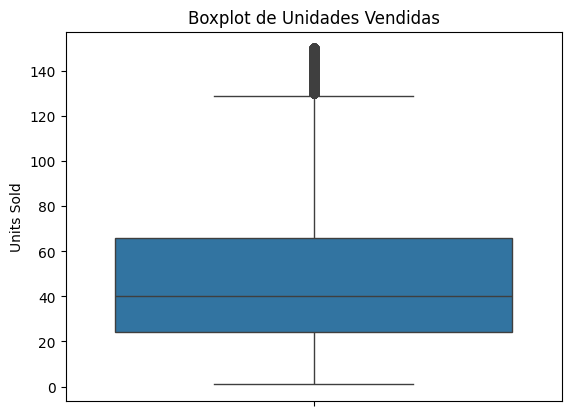

In [ ]:
sns.boxplot(y=dataclean['Units Sold'])
plt.title("Boxplot de Unidades Vendidas")
plt.show()

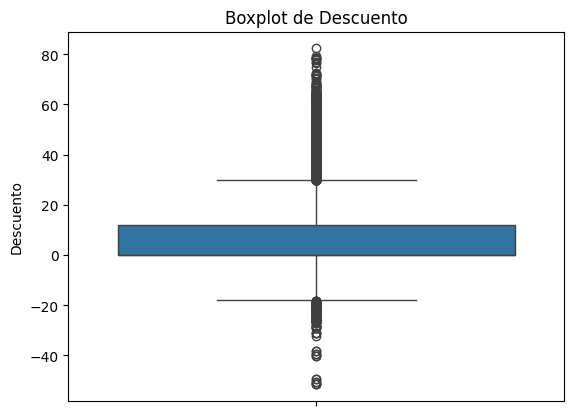

In [ ]:
sns.boxplot(y=dataT['Descuento'])
plt.title("Boxplot de Descuento")
plt.show()

In [ ]:
Q1=dataclean['Descuento'].quantile(0.25)
Q3=dataclean['Descuento'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
up=Q3+1.5*IQR

outliers=dataclean[(dataclean['Descuento']<low)|(dataclean['Descuento']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

dataclean=dataclean[(dataclean['Descuento']>=low)&(dataclean['Descuento']<=up)]
print(dataclean)
outliers=dataclean[(dataclean['Descuento']<low)|(dataclean['Descuento']>up)]
print(f"Número de outliers encontrados:{len(outliers)}")

Número de outliers encontrados:24774
        Store ID  Total Price  Base Price  Units Sold  Descuento
ID                                                              
2           8091      99.0375     99.0375          28        0.0
3           8091     133.9500    133.9500          19        0.0
4           8091     133.9500    133.9500          44        0.0
5           8091     141.0750    141.0750          52        0.0
9           8091     227.2875    227.2875          18        0.0
...          ...          ...         ...         ...        ...
212613      9961     232.2750    232.2750         107        0.0
212614      9961     236.5500    236.5500          26        0.0
212626      9984     131.1000    131.1000          32        0.0
212628      9984     170.2875    170.2875          30        0.0
212632      9984     194.5125    194.5125          85        0.0

[72591 rows x 5 columns]
Número de outliers encontrados:0


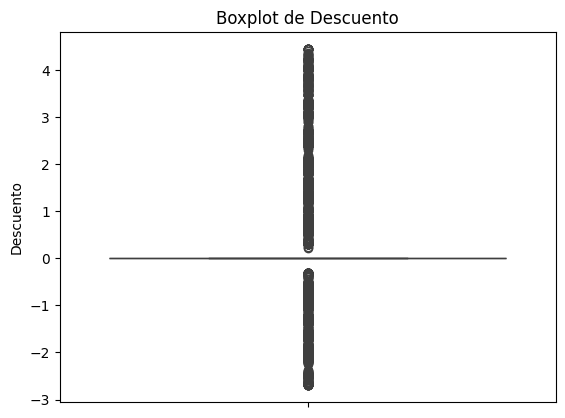

In [ ]:
sns.boxplot(y=dataclean['Descuento'])
plt.title("Boxplot de Descuento")
plt.show()

In [ ]:
dataclean.describe()

,Store ID,Total Price,Base Price,Units Sold,Descuento
count,72591.000000,72591.000000,72591.000000,72591.000000,72591.000000
mean,9212.195617,178.653994,178.678247,44.640024,0.014974
std,608.713597,64.622927,64.623003,29.978210,0.369033
min,8023.000000,61.275000,61.275000,1.000000,-2.688172
25%,8869.000000,118.987500,118.987500,22.000000,0.000000
50%,9425.000000,188.812500,188.812500,37.000000,0.000000
75%,9731.000000,225.862500,225.862500,60.000000,0.000000
max,9984.000000,375.487500,375.487500,150.000000,4.458599


In [ ]:
dataclean.tail()

,Store ID,Total Price,Base Price,Units Sold,Descuento
ID,,,,,
212613,9961,232.2750,232.2750,107,0.0
212614,9961,236.5500,236.5500,26,0.0
212626,9984,131.1000,131.1000,32,0.0
212628,9984,170.2875,170.2875,30,0.0
212632,9984,194.5125,194.5125,85,0.0


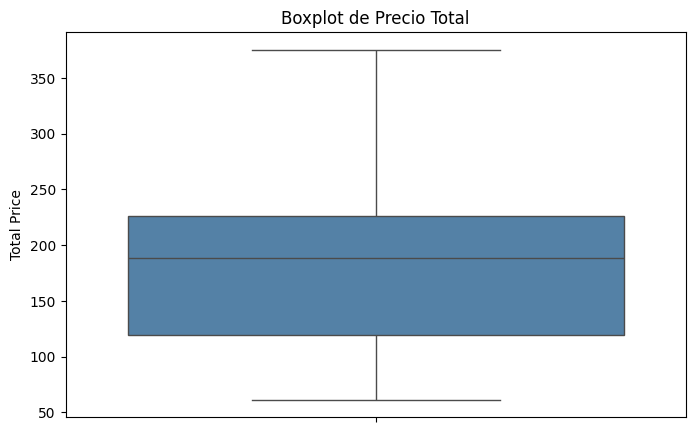

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataclean, y='Total Price', color='steelblue')
plt.title('Boxplot de Precio Total')
plt.ylabel('Total Price')
plt.show()

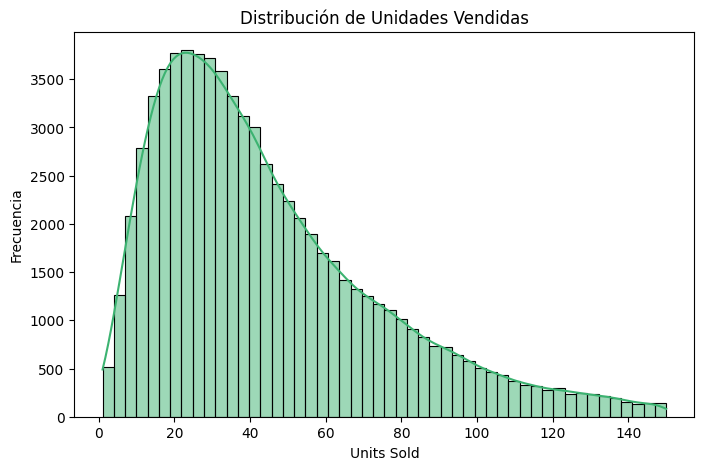

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dataclean['Units Sold'], bins=50, kde=True, color='mediumseagreen')
plt.title('Distribución de Unidades Vendidas')
plt.xlabel('Units Sold')
plt.ylabel('Frecuencia')
plt.show()


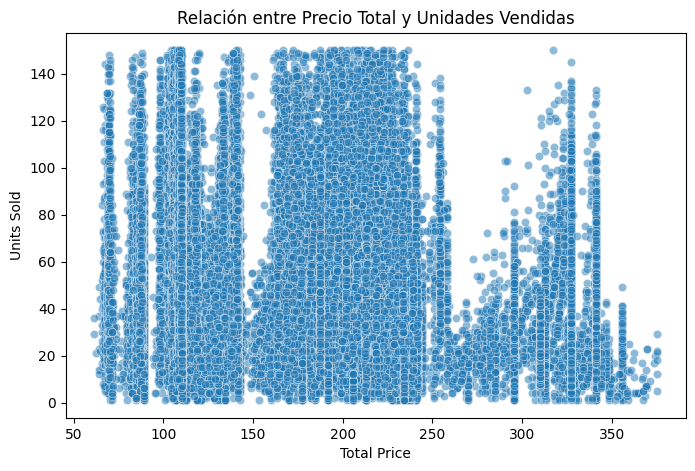

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataclean, x='Total Price', y='Units Sold', alpha=0.5)
plt.title('Relación entre Precio Total y Unidades Vendidas')
plt.xlabel('Total Price')
plt.ylabel('Units Sold')
plt.show()


<Axes: >

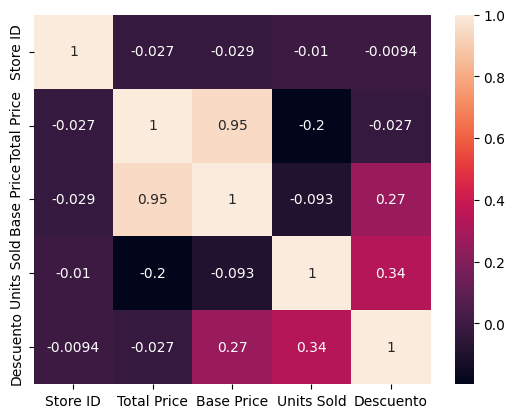

In [ ]:
sns.heatmap(dataT.corr(), annot=True)


<Axes: >

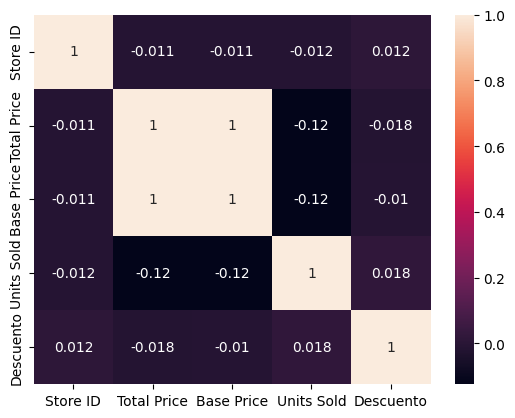

In [ ]:
sns.heatmap(dataclean.corr(), annot=True)
